# Dataprojekti

## Sisältö:
* ### [Johdanto](#1.-Johdanto)
* ### [Aineiston kerääminen](#2.-Aineiston-keraaminen)
* ### [Raapija](#3.-Raapija)
* ### [DCF-laskelmat](#4.-DCF-laskelmat)
* ### [Osakkeen hinnoittelu](#5.-Osakkeen-hinnoittelu)

# 1. Johdanto

### Yleistä
Jupyter Notebook on interaktiivinen kehitysympäristö datatutkimukselle ja
 -analyysille. Tämä projekti toteutetaan Jupyter Notebookissa. <br><br>
Projekti koostuu datatiedeprosessin keskeisistä vaiheista datan lukemisesta 
tulosten raportointiin. Projektin teemana käsitellään yritysten Yahoo Financesta 
saatavia eri liiketoiminna ja kannattavuuden lukuja, eli datalähteenä toimii
yfinance. <br><br>
### Vapaan kassavirran valuaatiosta
Projektissa lasketaan yritysten kassavirtoja ja tehdään DCF-laskelmia, joten 
niistä tulee kertoa hieman. DCF-laskelmilla osakkeen nykyarvo lasketaan yrityksen 
tulevaisuuden kassavirtojen nykyarvon avulla. Tässä työssä DCF-laskelmia 
käytetään arvioimaan yrityksen tai sen osakkeiden arvoa FCFF:n (Free Cash Flow 
to Firm) tai FCFE:n (Free Cash Flow to Equity) avulla.
FCFF ja FCFE eivät ole suoraan saatavaa dataa tilinpäätöksestä, joten työssä 
nämä lasketaan itse. Tutkimusten mukaan noin 70 % analyytikoista käyttää 
diskontattujen vapaiden kassavirtojen mallia, kun he arvostavat yrityksiä 
(CFA Institute).<br><br>
Free cash flow to firm tai free cash flow to equitya käytetään usein, kun 
joku tai useampi seuraavista kriteereistä täyttyy:<br>
- Yritys ei maksa osinkoa
- Maksettujen osinkojen määrä eroaa huomattavasti maksukykyyn nähden
- Vapaat kassavirrat ovat linjassa kannattavuuden kanssa kohtuullisen 
ennustejakson aikana
- Sijoittaja ottaa "kontrolli"-näkökulman (CFA Institute)<br><br>

Osakekannan arvo voidaan määrittää suoraan määrittämällä FCFE:n 
nykyarvon tai epäsuorasti FCFF:n avulla määrittämällä yrityksen arvo ja 
vähentämällä tästä velat, päätyen oletettuun pääoman arvoon. Esimerkiksi FCFE:n 
kohdalla osakekannan arvo voidaan selvittää diskonttaamalla tulevaisuuden FCFE:t
 tuottovaatimuksella. (CFA Institute) Yksittäisen osakkeen arvo saadaan tämän 
 jälkeen jakamalla pääoman arvo osakkeiden lukumäärällä. 

# 2. Aineiston kerääminen
Dataa voidaan kerätä Pythonilla monella eri tavalla. Usein käytetty tapa on 
hyödyntää Pandas-kirjastoa ja DataFrame-rakennetta. Vaihtoehtoisesti dataa
voidaan kerätä API-kutsuilla, Excel-tiedostoista tai muiden menetelmien avulla. 
DataFrame on tarjoaa tehokkaan tavan käsitellä datarivejä ja -sarakkeita.
<br><br>

## Datan lukeminen lähteestä

Projektia varten kerätään dataa Yahoo Financesta. Luetaan seuraavaksi sieltä 
yrityksen taloudellisia tietoja. Valitaan tähän 
esimerkkiin yritykseksi Alibaba, eli BABA. <br>
Hyödynnetään Pythonin pandasia ja yfinancea datan lukemisessa. <br><br>
Määritetään alkuun analysoitava yritys ja asetetaan tuottovaatimus.<br><br>

In [43]:
# INSTALL IF NEEDED

#%pip install yfinance
#%pip install pandas
#%pip install requests
#%pip install plotly
#%pip install numpy
#%pip install matplotlib
#%pip install beautifulsoup4

In [44]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [45]:
# Stock to be analyzed
TICKER = yf.Ticker('BABA')

# Required rate of return
RRR = 0.12

# WACC for the company
wacc = 0.11

Tarkastellaa seuraavaksi yrityksen tietoja info-metodilla, joka antaa yleisiä
yritykseen liittyviä tietoja.

In [46]:
info = TICKER.info
info['longBusinessSummary']

"Alibaba Group Holding Limited, through its subsidiaries, provides technology infrastructure and marketing reach to help merchants, brands, retailers, and other businesses to engage with their users and customers in the People's Republic of China and internationally. The company operates through seven segments: China Commerce, International Commerce, Local Consumer Services, Cainiao, Cloud, Digital Media and Entertainment, and Innovation Initiatives and Others. It operates Taobao, a digital retail platform; Tmall, a third-party online and mobile commerce platform; Alimama, a monetization platform; 1688.com and Alibaba.com, which are online wholesale marketplaces; AliExpress, a retail marketplace; Lazada, Trendyol, and Daraz that are e-commerce platforms; Freshippo, a retail platform for groceries and fresh goods; and Tmall Global, an import e-commerce platform. The company also operates Cainiao Network logistic services platform; Ele.me, an on-demand delivery and local services platfor

Katsotaan vielä muita yrityksen tärkeitä tietoja, joita voidaan halutessaan
hakea eri datan haku komennoilla.

In [47]:
# Understand the owner structure
print("Insider holdings:", round(TICKER.info['heldPercentInsiders'] * 100,
                                  2), "%")
print("Institutional holdings:", round(TICKER.info['heldPercentInstitutions'] *
                                       100, 2), "%")

Insider holdings: 0.01 %
Institutional holdings: 14.18 %


In [48]:
# Corporate actions. Also could use .dividends or .splits.
actions = TICKER.actions
actions_df = pd.DataFrame(actions)

actions_df.head()

,Dividends,Stock Splits
Date,,
2023-12-20 00:00:00-05:00,1.0,0.0


In [49]:
# Financial statements
financials = TICKER.financials
financials_df = pd.DataFrame(financials)

financials_df.head()

,2023-03-31,2022-03-31,2021-03-31,2020-03-31
Tax Effect Of Unusual Items,-461380000.0,-6285250000.0,0.0,-71071511.296469
Tax Rate For Calcs,0.17,0.25,0.176823,0.123388
Normalized EBITDA,155826000000.0,153367000000.0,217963000000.0,214828000000.0
Total Unusual Items,-2714000000.0,-25141000000.0,0.0,-576000000.0
Total Unusual Items Excluding Goodwill,-2714000000.0,-25141000000.0,0.0,-576000000.0


In [50]:
# Financial statements
balance = TICKER.balancesheet
balance_df = pd.DataFrame(balance)

balance_df.head()

,2023-03-31,2022-03-31,2021-03-31,2020-03-31
Ordinary Shares Number,20526017712.0,21357323112.0,21699031448.0,21491994944.0
Share Issued,20526017712.0,21357323112.0,21699031448.0,21491994944.0
Total Debt,195569000000.0,176597000000.0,181439000000.0,147287000000.0
Tangible Book Value,665748000000.0,607242000000.0,564517000000.0,405652000000.0
Invested Capital,1151011000000.0,1089823000000.0,1086623000000.0,880831000000.0


In [51]:
# Financial statements
cashflow = TICKER.cashflow
cashflow_df = pd.DataFrame(cashflow)

cashflow_df.head()

,2023-03-31,2022-03-31,2021-03-31,2020-03-31
Free Cash Flow,165400000000.0,89435000000.0,188601000000.0,135221000000.0
Repurchase Of Capital Stock,-74746000000.0,-61225000000.0,-773000000.0,0.0
Repayment Of Debt,-11448000000.0,-16713000000.0,-7061000000.0,-31741000000.0
Issuance Of Debt,22790000000.0,9427000000.0,38410000000.0,15719000000.0
Issuance Of Capital Stock,11000000.0,109000000.0,175000000.0,91506000000.0


## Datan käsittely

Seuraavaksi lasketaan datan avulla yrityksen viimeisen neljän vuoden FCFE:t (Free Cash Flow to Equity) sekä näiden keskiarvo.
<br><br>

$
\text{FCFE} = \text{Cash from Operations} - \text{Capital Expenditures} + 
\text{Net Debt Issued}
$

In [52]:
# Dates of the data
dates = cashflow.keys()

# Empty list for FCFE
fcf_data = pd.DataFrame(index=dates)

for date in dates:
    # Extract the components
    operating_cashflow = cashflow_df[date]['Operating Cash Flow']
    cap_ex = cashflow_df[date]['Capital Expenditure'] # Or Purchase Of PPE
    net_debt = cashflow_df[date]['Net Issuance Payments Of Debt']
    
    # Calculate FCFE (cap_ex is already negative so it is added)
    fcfe = operating_cashflow + cap_ex + net_debt
    
    # Add FCFE to the list
    fcf_data.loc[date, 'FCFE'] = fcfe

# Display new dataframe
print(fcf_data)

# Calculate and display average FCFE
average_fcfe = fcf_data['FCFE'].mean()

print()
print("Average FCFE: ", average_fcfe/1000000, "million.")

                    FCFE
2023-03-31  1.767420e+11
2022-03-31  8.214900e+10
2021-03-31  2.199500e+11
2020-03-31  1.191990e+11

Average FCFE:  149510.0 million.


Tuloksista nähdään, että viimeisen neljän vuoden aikana keskimääräinen FCFE on
 ollut noin 150 miljardia renminbiä. Lisäksi näämme yksilöidysti 2020–2023 
 vuosien FCFE:t. Tehdään seuraavaksi sama yrityksen viimeisen neljän vuoden 
 FCFF:lle (Free Cash Flow to Firm).<br><br>

$
\text{FCFF} = \text{Cash from Operations} + \text{Interest Expense}(1 – 
\text{Companys Tax rate}) – \text{Capital Expenditure}
$

In [53]:
# Calculate the tax rate for the company: (tax paid) / (profit before tax)
previous_tax_rates = financials_df.loc['Tax Provision'] / financials_df.loc['Pretax Income']

# Mean of the previous years
tax_rate = previous_tax_rates.mean()
print("Effective Tax Rate:", round(tax_rate * 100, 2), "%")

Effective Tax Rate: 23.12 %


In [54]:
for date in dates:
    # Extract the components
    operating_cashflow = cashflow_df[date]['Operating Cash Flow']
    cap_ex = cashflow_df[date]['Capital Expenditure'] # Or Purchase Of PPE
    interest_expense = financials_df[date]['Interest Expense']
    
    # Calculate FCFF (cap_ex is already negative so it is added)
    fcff = operating_cashflow + interest_expense * (1 - tax_rate) + cap_ex
    
    # Add FCFF to the list
    fcf_data.loc[date, 'FCFF'] = fcff

# Display new dataframe
print(fcf_data)

# Calculate and display average FCFF
average_fcff = fcf_data['FCFF'].mean()

print()
print("Average FCFF: ", average_fcff/1000000, "million.")

                    FCFE          FCFF
2023-03-31  1.767420e+11  1.784609e+11
2022-03-31  8.214900e+10  1.052805e+11
2021-03-31  2.199500e+11  1.920421e+11
2020-03-31  1.191990e+11  1.392033e+11

Average FCFF:  153746.70440057167 million.


Tuloksista nähdään, että viimeisen neljän vuoden aikana keskimääräinen FCFF on
 ollut noin 150 miljardia renminbiä, mikä on hyvin lähellä FCFE:tä. Lisäksi 
 näämme yksilöidysti 2020–2023 vuosien FCFF:t.

## Datan visualisointi

Visualisoidaan Yahoo Financesta haettujen tietojen perusteella lasketut FCFE
ja FCFF. Luodaan pylväsdiagrammi, jonka avulla hahmoitamme kassavirtaa paremmin.

In [55]:
# Save the plots for export to pdf
all_figures = []

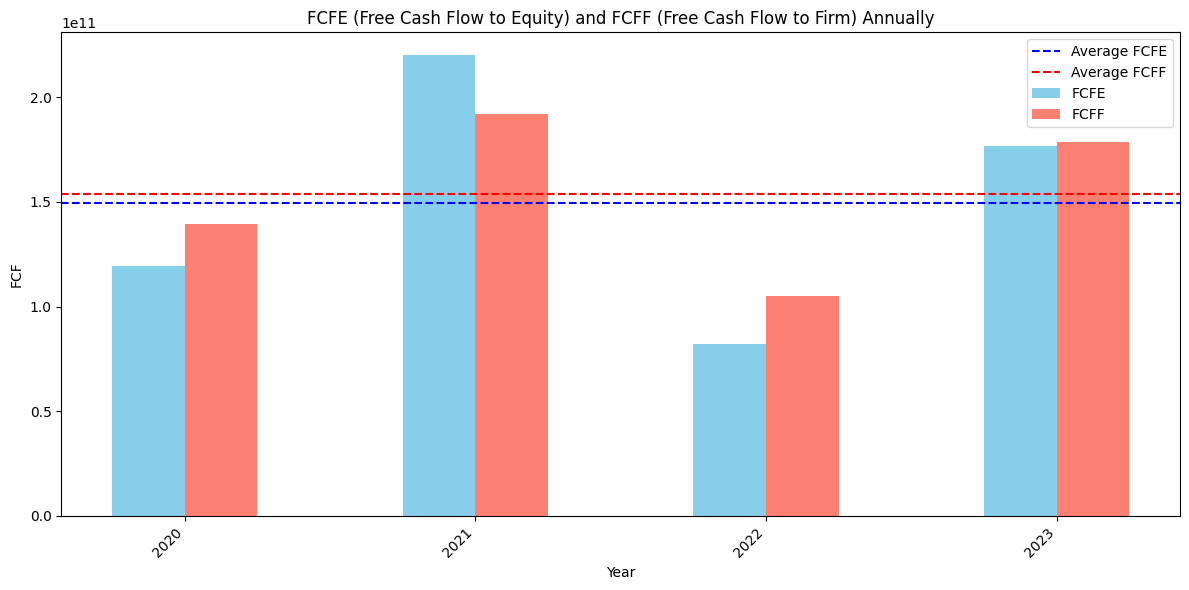

In [56]:
# Set the width of the bars
bar_width = 0.25

plt.figure(figsize=(12, 6))

# Get the FCFE and FCFF data
fcfe_values = fcf_data['FCFE'][::-1] 
fcff_values = fcf_data['FCFF'][::-1] 

# Calculate the positions for the bars
positions_fcfe = np.arange(len(dates))
positions_fcff = positions_fcfe + bar_width

# Plot FCFE and FCFF
plt.bar(positions_fcfe, fcfe_values, bar_width, color='skyblue', label='FCFE')
plt.bar(positions_fcff, fcff_values, bar_width, color='salmon', label='FCFF')

# Adding average lines
plt.axhline(y=average_fcfe, color='b', linestyle='--', label='Average FCFE')
plt.axhline(y=average_fcff, color='r', linestyle='--', label='Average FCFF')

# Extract only the year portion of the dates for x-axis tick labels
formatted_dates = [datetime.strptime(str(date), '%Y-%m-%d %H:%M:%S').year 
                   for date in dates][::-1] 

# Adding labels
plt.xlabel('Year')
plt.ylabel('FCF')
plt.title('FCFE (Free Cash Flow to Equity) and FCFF (Free Cash Flow to Firm) Annually')

plt.xticks(np.arange(len(dates)) + bar_width / 2, formatted_dates, rotation=45, ha='right') 
plt.legend()
plt.tight_layout()

fig = plt.gcf()
all_figures.append(fig)

plt.show()

# 3. Raapija

## Valuutanvaihtokurssi

Haetaan harjoituksen vuoksi tässä luvussa valuutan vaihtokurssi eri valuuttaa 
oleville taloudellisille luvuille raapijan avulla. Näin saamme muutettua 
lopussa kaikki laskennalliset osakkeiden hinnat samaksi valuutaksi, mitä osake 
oikeasti on. Luodaan ensin funktiot kurssin etsimiseksi:

In [57]:
import requests
from bs4 import BeautifulSoup

In [58]:
# Function that get a excange rate
def get_exchange_rate(base_currency, target_currency):
    page = requests.get(f"https://www.x-rates.com/calculator/?from={base_currency}&to={target_currency}&amount=1")
    soup = BeautifulSoup(page.text, 'html.parser')
    exchange_rate = soup.find(class_="ccOutputTrail").previous_sibling.get_text(strip=True)
    return float(exchange_rate)

# Function that converts an amount of currency to another
def convert_currency(rate, amount):
    converted_amount = amount * rate
    return converted_amount


Tunnistetaan seuraavaksi valuutat ja haetaan vaihtokurssi:

In [59]:
# Define the currency of the finacial data and the stock price
base_currency = info['financialCurrency']
target_currency = info['currency']
amount = 1

# Convert an amount 
exchange_rate = get_exchange_rate(base_currency, target_currency)
conversion_rate = convert_currency(exchange_rate, amount)

print(f"{amount} {base_currency} is equivalent to {conversion_rate} {target_currency}")

1 CNY is equivalent to 0.1383 USD


# 4. DCF-laskelmat
Kappaleessa suoritetaan neljän vuoden FCFE ja FCFF keskiarvon perusteella 
DCF-laskelmat yrityksen osakekannan arvon määrittämiseksi. Laskuja tehdään
kolme kappaletta (ei kasvua, jatkuva kasvu, kasvu 5 v - jonka jälkeen jatkuvaa 
kasvua) <br>

## Kavuun liittyvät määrittelyt

Määritetään alkuun loputtomasti jatkuvalle kasvulle (Terminal Growth) ja alun 
kasvulle ennustetut nopeudet. Lisäksi määritetään alussa olevan kasvun keston 
aika vuosina.

In [60]:
# Terminal growth rate
t_g = 0.01

# Beginging years growth rate
g = 0.05

# Begining number of years 
years = 5

## FCFE
Osakekannan arvo voidaan löytää diskonttaamalla FCFE tuottovaatimuksella, eli 
nolla kasvun tapauksessa näin:

In [61]:
def infinite_sum(fcf, r, max_terms=1000):
    total = 0
    for t in range(1, max_terms + 1):
        term = fcf / (1 + r) ** t
        total += term
    
    return total

# Example usage for BABA 4-year average FCFE and RRR
equity_value = infinite_sum(average_fcfe, RRR)
print("Equity value using FCFE:", round(equity_value/1000000000, 1), "billion.")

Equity value using FCFE: 1245.9 billion.


Jos FCFE:n oletetaan kasvavan tai pienenevän tasaisesti loputtomiin voidaan 
osakekannan arvo määrittää seuraavalla kaavalla:

In [62]:
def growing_fcf(fcfe, t_g, r):
    value = (fcfe * (1 + t_g)) / (r - t_g)
    return value

# Example usage for BABA 4-year average FCFE and RRR
equity_value_growth = growing_fcf(average_fcfe, t_g, RRR)
print("Equity value using FCFE:", round(equity_value_growth/1000000000, 1), 
      "billion.")

Equity value using FCFE: 1372.8 billion.


Jos oletetaan FCFE:n kasvavan tai laskevan ensin jokun aikaa tasaisesti tiettyä vauhtia ja 
tämän jälkeen kasvavan toista vauhtia loputtomiin, voidaan käyttää seuraavaa kaavaa:

In [63]:
def two_stage_fcf_valuation(fcf, r, g, t_g, n):
    total = 0
    
    for t in range(1, n + 1):
        fcf = fcf * (1 + g)
        term = fcf / ((1 + r) ** t)

        total += term

    second_term_total = ((fcf * (1 + t_g)) / (r - t_g)) / ((1 + r) ** n)

    return total + second_term_total

# Example usage for BABA 4-year average FCFE and RRR
equity_value_two_stage = two_stage_fcf_valuation(average_fcfe, RRR, g, t_g, years)
print("Equity value using FCFE:", round(equity_value_two_stage/1000000000, 1), 
      "billion.")

Equity value using FCFE: 1612.7 billion.


FCFE:tä käytettäessä tulee kiinnittä erityistä huomiota, ettei yrityksen velan 
määrä ole korkea, koska tämä voi johtaa pienempiin kuin arvioituihin 
kassavirtoihin osakkeenomistajille. Korkean velan lisäksi yrityksen ei tulisi 
olla selvitystilassa eikä sillä tulisi olla muita monimutkaisia 
kapitalisaatiorakenteita, jotka vaikuttavat osakkeenomistajien eriarvoisuuteen 
(vaikka malleja voidaan muuttaa niin, että nämä otetaan huomioon).
<br><br>
Tämän vuoksi tarkastellaan seuraavaksi yrityksen velkaantuneisuutta 
Debt-to-Equity- ja Debt-to-EBITDA-suhteilla. Jos yritys ei ole velkainen FCFE:tä 
voidaan käyttää osakkeista maksettavan hinnan määrittämisessä.

In [64]:
# Get ratios
debt_to_equity = round(info['debtToEquity']/100, 2)
debt_to_ebitda = round(info['totalDebt']/info['ebitda'], 2)

# Display ratios
print("Debt-to-Equity ratio:", debt_to_equity)
if debt_to_equity > 2:
    print("High debt (Debt-to-Equity ratio above 2)")
else:
    print("Debt-to-Equity ratio is within good or acceptable range")

print()

print("Debt-to-EBITDA ratio:", debt_to_ebitda)
if debt_to_ebitda > 3:
    print("High debt (Debt-to-EBITDA ratio over 3)")
else:
    print("Debt-to-EBITDA ratio is within good or acceptable range")


Debt-to-Equity ratio: 0.17
Debt-to-Equity ratio is within good or acceptable range

Debt-to-EBITDA ratio: 1.09
Debt-to-EBITDA ratio is within good or acceptable range


## FCFF
Free Cash Flow to the Firmia (FCFF) käytetään arvioimaan yrityksen nykyarvoa
 tulevaisuuden FCFF:ien diskonttauksen kautta Weighted Average Cost of Capitalin
 (WACC) avulla. Tämän jälkeen osakepääoman arvo voidaan selvittää vähentämällä 
 yrityksen nykyarvosta sen velat. Lasketaan FCFF ilman kasvuodotuksia, tasaisen 
 jatkuvan kasvuodotuksen kanssa ja kaksivaiheisen kasvuodotuksen avulla:

In [65]:
# Example usage for BABA 4-year average FCFF and WACC (no growth)
firm_value = infinite_sum(average_fcff, wacc)

print("Firm value using FCFF:", round(firm_value/1000000000, 1), "billion.")
print("Equity value using FCFF:", round((firm_value - info['totalDebt'] + 
                                        info['totalCash']) / 1000000000, 1),
                                          "billion.")

Firm value using FCFF: 1397.7 billion.
Equity value using FCFF: 1813.6 billion.


In [66]:
# Example usage for BABA 4-year average FCFF and WACC (expected growth)
firm_value_growth = growing_fcf(average_fcff, t_g, wacc)

print("Firm value using FCFF:", round(firm_value_growth/1000000000, 1), 
      "billion.")
print("Equity value using FCFF:", round((firm_value_growth - info['totalDebt'] +
                                         info['totalCash']) /1000000000, 
                                         1), "billion.")

Firm value using FCFF: 1552.8 billion.
Equity value using FCFF: 1968.7 billion.


In [67]:
# Example usage for BABA 4-year average FCFF and WACC (two-stage growth)
firm_value_two_stage = two_stage_fcf_valuation(average_fcff, wacc, g,t_g, years)

print("Firm value using FCFF:", round(firm_value_two_stage/1000000000, 1), 
      "billion.")
print("Equity value using FCFF:", round((firm_value_two_stage - 
                                         info['totalDebt'] + info['totalCash']) 
                                         /1000000000, 1), "billion.")

Firm value using FCFF: 1828.8 billion.
Equity value using FCFF: 2244.7 billion.


# 5. Osakkeen hinnoittelu

## Kassavirtojen avulla

Lakettaessa hintaa osakkeelle FCFE:n ja FCFF:n keskiarvojen 
perusteella tehtyjen DCF-laskelmien avulla tulee osakkeenomistajille laskettu 
arvo vain jakaa osakkeiden määrällä. Tässä vaiheessa on kuitenkin hyvä huomioida 
pari mahdollista kompastuskiveä. FCFF laskelmissa hyödynnettiin korkona WACC. 
Tulee huomata, että kun WACC muuttuu, niin muuttuu myös laskennallinen 
osakkeen arvo. Osakkeen laskennallinen arvo muuttuu myös jos kasvunäkymät 
muuttuvat ja jos jotkin ulkoiset tai sisäiset tekijät vaikuttavat yrityksen 
kilpailu- tai tuloksentekokykyyn. Lisäksi osakkeiden absoluuttinen määrä 
vaikuttaa suoraan osakkeen hintaan.<br><br>

### FCFE

Lasketaan ensin FCFE:n perusteella osakkeelle arvo:

In [68]:
# No growth
stock_price_fcfe = equity_value / info['sharesOutstanding']

# Growth
stock_price_fcfe_growth = equity_value_growth / info['sharesOutstanding']

# Two-Stage
stock_price_fcfe_two = equity_value_two_stage / info['sharesOutstanding']

# Conversion to the same currency as the stock
stock_price_fcfe = stock_price_fcfe * conversion_rate
stock_price_fcfe_growth = stock_price_fcfe_growth * conversion_rate
stock_price_fcfe_two = stock_price_fcfe_two * conversion_rate

In [69]:
print("Based on the", RRR * 100, "%", 
      "required rate of return and no growth the value of a stock is:", 
      round(stock_price_fcfe, 2))
print("Based on the", RRR * 100, "%", "required rate of return and", t_g * 100,
       "%", "terminal growth the value of a stock is:", 
       round(stock_price_fcfe_growth,2))
print("Based on", RRR * 100, "%", "RRR,", g * 100, "%", "initial growth and", 
      t_g * 100, "%", "terminal growth the value of a stock is:", 
       round(stock_price_fcfe_two,2))

print()

print("Current actual price is:", info['currentPrice'])


Based on the 12.0 % required rate of return and no growth the value of a stock is: 68.92
Based on the 12.0 % required rate of return and 1.0 % terminal growth the value of a stock is: 75.94
Based on 12.0 % RRR, 5.0 % initial growth and 1.0 % terminal growth the value of a stock is: 89.21

Current actual price is: 72.44


Plotting the same information as above:

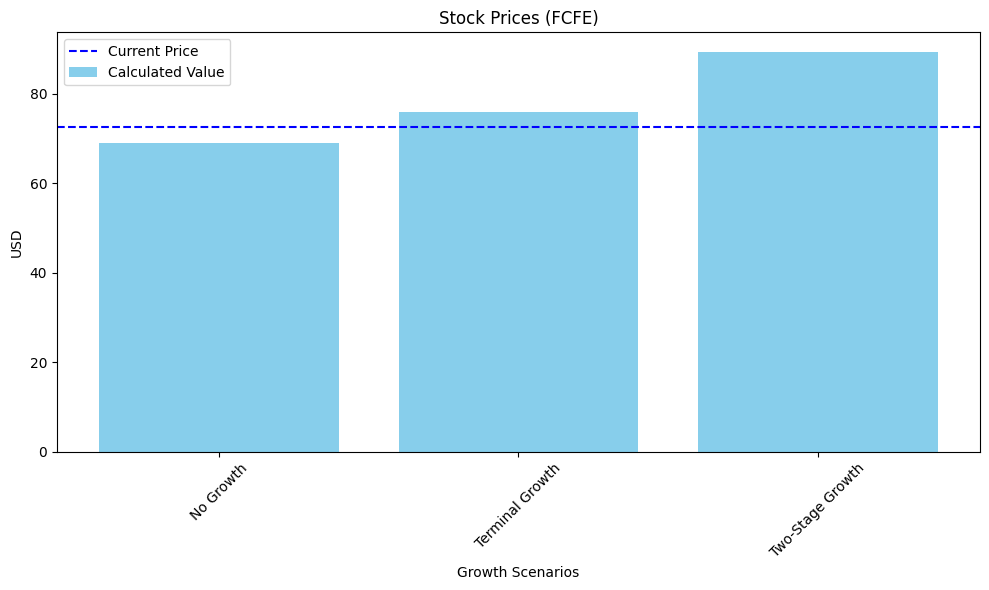

In [70]:
scenarios = ['No Growth', 'Terminal Growth', 'Two-Stage Growth']
prices = [stock_price_fcfe, stock_price_fcfe_growth, stock_price_fcfe_two]

# Plotting
plt.figure(figsize=(10, 6))

# Plotting the stock prices
plt.bar(scenarios, prices, color='skyblue', label='Calculated Value')

# Adding a line for the current price
plt.axhline(y=info['currentPrice'], color='b', linestyle='--', label='Current Price')

# Adding labels and title
plt.xlabel('Growth Scenarios')
plt.ylabel(target_currency)
plt.title('Stock Prices (FCFE)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

fig = plt.gcf()
all_figures.append(fig)

plt.show()

### FCFF
Lasketaan seuraavaksi FCFF:n perusteella osakkeelle hinta:

In [71]:
# No growth
stock_price_fcff = (firm_value - info['totalDebt'] + 
                    info['totalCash']) / info['sharesOutstanding']

# Growth
stock_price_fcff_growth = (firm_value_growth - info['totalDebt'] + 
                           info['totalCash']) / info['sharesOutstanding']

# Two-Stage growth
stock_price_fcff_two = (firm_value_two_stage - info['totalDebt'] + 
                        info['totalCash']) / info['sharesOutstanding']

#Currency to USD
stock_price_fcff = stock_price_fcff * conversion_rate
stock_price_fcff_growth = stock_price_fcff_growth * conversion_rate
stock_price_fcff_two = stock_price_fcff_two * conversion_rate

# Calculate margins of safety
mof = round(-1 * (info['currentPrice'] / stock_price_fcff - 1), 2)
mof_g = round(-1 * (info['currentPrice'] / stock_price_fcff_growth - 1), 2)
mof_t = round(-1 * (info['currentPrice'] / stock_price_fcff_two - 1), 2)

In [72]:
# Printouts
print("With a WACC of", wacc * 100, "%", "and no growth the value of a stock is:", 
      round(stock_price_fcff, 2))
print("With a WACC of", wacc * 100, "%", "and", t_g * 100, "%", 
      "terminal growth the value of a stock is:", round(stock_price_fcff_growth, 2))
print("With a WACC of", wacc * 100, "%,", g * 100, "%", "initial growth and", 
      t_g * 100, "%", "terminal growth the value of a stock is:", 
      round(stock_price_fcff_two, 2))

print()

# Display margin of safety
print("With no growth there is a", mof * 100, "%", "margin of safety")
print("With", t_g * 100, "%", "terminal growth there is a", mof_g * 100, "%", 
      "margin of safety")
print("With", g * 100, "%", "initial growth and", t_g * 100, "%", 
      "terminal growth there is a", mof_t * 100, "%", "margin of safety")

print()

print("Current actual price is:", info['currentPrice'])

With a WACC of 11.0 % and no growth the value of a stock is: 100.33
With a WACC of 11.0 % and 1.0 % terminal growth the value of a stock is: 108.91
With a WACC of 11.0 %, 5.0 % initial growth and 1.0 % terminal growth the value of a stock is: 124.18

With no growth there is a 28.000000000000004 % margin of safety
With 1.0 % terminal growth there is a 33.0 % margin of safety
With 5.0 % initial growth and 1.0 % terminal growth there is a 42.0 % margin of safety

Current actual price is: 72.44


Plotting the same information as above:

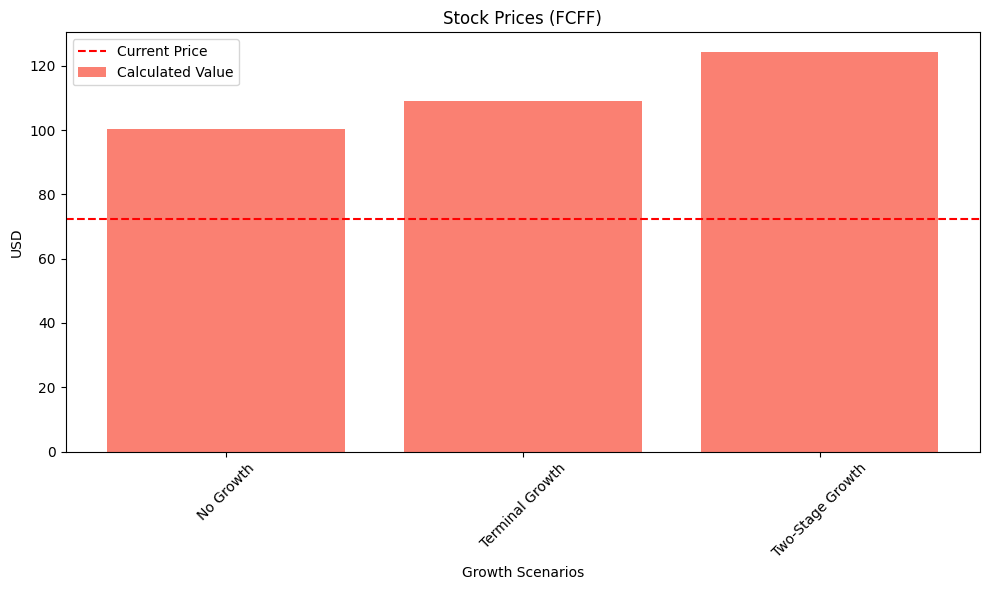

In [73]:
scenarios = ['No Growth', 'Terminal Growth', 'Two-Stage Growth']
prices = [stock_price_fcff, stock_price_fcff_growth, stock_price_fcff_two]

# Plotting
plt.figure(figsize=(10, 6))

# Plotting the stock prices
plt.bar(scenarios, prices, color='salmon', label='Calculated Value')

# Adding a line for the current price
plt.axhline(y=info['currentPrice'], color='r', linestyle='--', label='Current Price')

# Adding labels and title
plt.xlabel('Growth Scenarios')
plt.ylabel(target_currency)
plt.title('Stock Prices (FCFF)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

fig = plt.gcf()
all_figures.append(fig)

plt.show()

## Kasvu skenaariot

Piirretään kuvaaja, jossa kuvataan erilaisia mahdollisia kasvu skenaarioita ja 
osakkeen hintoja FCFE:n perusteella näissä skenaarioissa. Skenaarioiden avulla 
voidaan katsoa nopeasti yhdellä silmäyksellä eri ääripäitä ja todennäköisiä 
osakkeen arvoja. Eri skenaariot 
koostuvat:<br>
- Alku kasvu 5-10 vuotta, jonka voimakkuus -5–15 %
- Loppuvaiheen kasvu -2–4 %

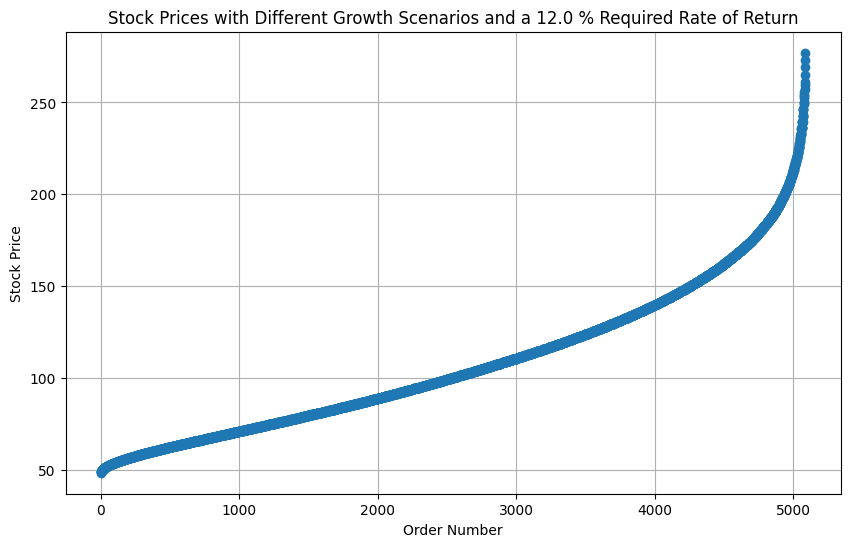

In [74]:
# Ranges
year_sc = np.arange(5, 11)
g_sc = np.arange(-0.05, 0.16, 0.002)
t_g_sc = np.arange(-0.02, 0.05, 0.01)  
shares = info['sharesOutstanding']

# Calculate FCFE valuation for each combination of parameters
valuations = []
for year in year_sc:
    for g in g_sc:
        for t_g in t_g_sc:
            price = two_stage_fcf_valuation(average_fcfe, RRR, g, t_g, year)
            stock_price = (price / shares) * conversion_rate
            valuations.append(stock_price)

# Convert valuations to numpy array
valuations_array = np.array(valuations)

# Sort the stock prices
sorted_stock_prices = np.sort(valuations_array)

# Plot the sorted stock prices with flipped axes
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(sorted_stock_prices)), sorted_stock_prices, marker='o', linestyle='None')
plt.title(f'Stock Prices with Different Growth Scenarios and a {RRR * 100} % Required Rate of Return')
plt.xlabel('Order Number')
plt.ylabel('Stock Price')
plt.grid(True)

fig = plt.gcf()
all_figures.append(fig)

plt.show()


## Tunnusluvut

DCF-laskelmien lisäksi analyytikot tykkäävät usein tarkastella myös 
kannattavuuskertoimia (CFA Institute). Lisätään tämän vuoksi myös muutamia 
yleisiä kannattavuuskertoimia, jotta saamme paremman käsityksen yrityksen
kannattavuudesta, hinnoittelusta ja maksuvalmiudesta.

In [75]:
# Define ratios
pe_ratio = round(info['forwardPE'], 1)
pb_ratio = round(info['previousClose'] / (info['bookValue']*conversion_rate), 1)
q_ratio = round(info['quickRatio'], 2)
c_ratio = round(info['currentRatio'], 2)
g_margin = round(info['grossMargins']* 100, 1)
p_margin = round(info['profitMargins']* 100, 1)
roe = round(info['returnOnEquity'] * 100, 1)
dividend = round(info['dividendYield'] * 100, 1)

In [76]:
# Print ratios
print("Forward P/E:", pe_ratio)
print("P/B ratio:", pb_ratio)

print()

print("Quick ratio:", q_ratio)
print("Current ratio:", c_ratio)
print("Short ratio:", round(info['shortRatio'], 2))

print()

print("Gross margin:", g_margin, "%")
print("Profit margin:", p_margin, "%")

print()

print("ROE:", roe, "%")
print("Dividend yield:", dividend, "%")
print("Cash per Share:", round(info['totalCashPerShare'] * conversion_rate, 1), 
      target_currency)

Forward P/E: 8.2
P/B ratio: 1.3

Quick ratio: 1.37
Current ratio: 1.8
Short ratio: 2.9

Gross margin: 37.9 %
Profit margin: 10.8 %

ROE: 8.2 %
Dividend yield: 1.4 %
Cash per Share: 4.2 USD


Visualisoidaan vielä edellä mainitut kannattavuuden tunnusluvut.

In [77]:
# Define data groups
ratios_group1 = ['P/B ratio', 'Quick ratio', 'Current ratio']
ratio_values_group1 = [pb_ratio, q_ratio, c_ratio]
ratio_thresholds_group1 = [(1, 2), (1, 0.5), (2, 1)]

percentages_group2 = ['Forward P/E', 'ROE-%', 'Dividend yield -%']
percentage_values_group2 = [pe_ratio, roe, dividend]
percentage_thresholds_group2 = [(12, 20), (15, 5), (5, 0)]

percentages_group3 = ['Gross margin', 'Profit margin']
percentage_values_group3 = [g_margin, p_margin]
percentage_thresholds_group3 = [(40, 20), (10, 5)]

# Colors based on thresholds
def get_color(value, thresholds):
    if thresholds[0] < thresholds[1]:
        if value < thresholds[0]:
            return 'green' 
        elif value > thresholds[1]:
            return 'red' 
    else:
        if value > thresholds[0]:
            return 'green' 
        elif value < thresholds[1]:
            return 'red' 
    return 'lightgrey'

# Function to annotate bars with values
def annotate_bars(ax, values):
    for i, value in enumerate(values):
        ax.text(i, value + 0.05, str(value), ha='center', va='bottom')

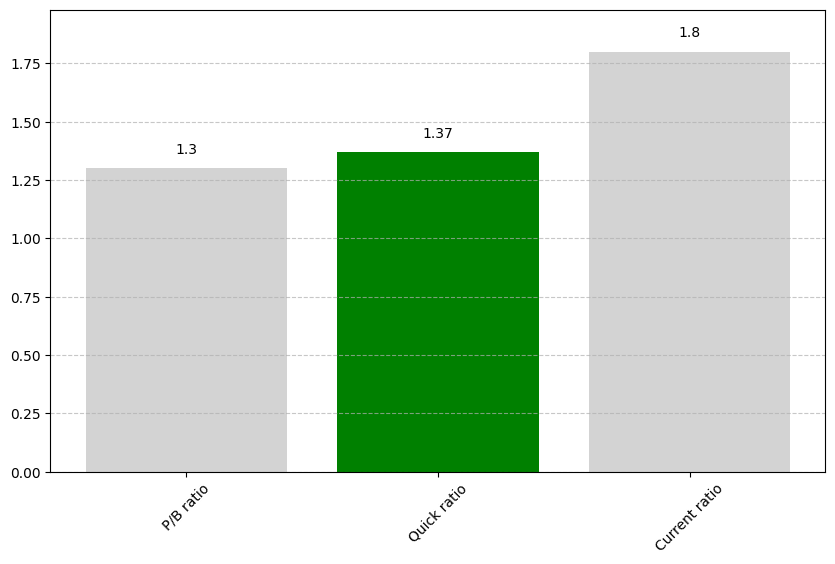

In [78]:
# Plotting key ratios
plt.figure(figsize=(10, 6))
ratios_colors_group1 = [get_color(value, thresholds) for value, thresholds in 
                        zip(ratio_values_group1, ratio_thresholds_group1)]
bars = plt.bar(ratios_group1, ratio_values_group1, color=ratios_colors_group1)
plt.xticks(rotation=45)
plt.ylim(0, max(ratio_values_group1) * 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
annotate_bars(plt.gca(), ratio_values_group1)

fig = plt.gcf()
all_figures.append(fig)

plt.show()

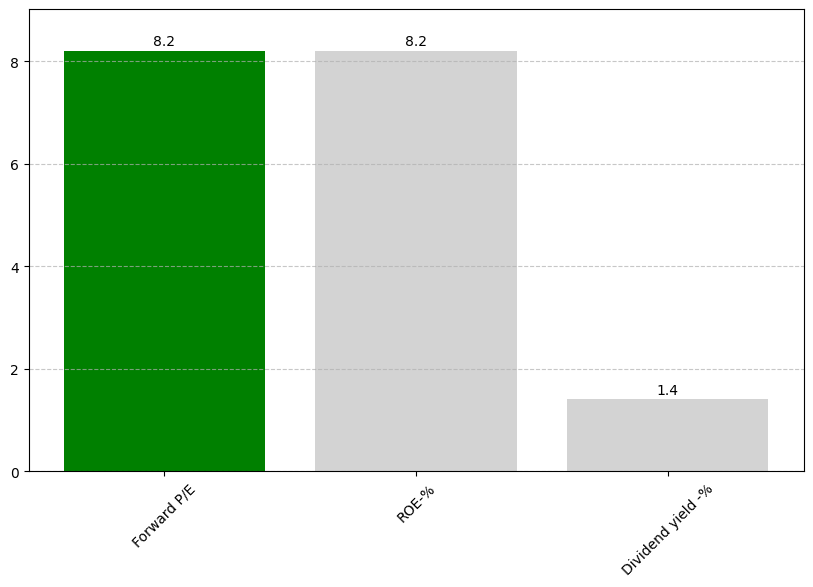

In [79]:
# Plotting key metrics
plt.figure(figsize=(10, 6))
percentages_colors_group2 = [get_color(value, thresholds) for value, thresholds 
                             in zip(percentage_values_group2, 
                                    percentage_thresholds_group2)]
bars = plt.bar(percentages_group2, percentage_values_group2, 
               color=percentages_colors_group2)
plt.xticks(rotation=45)
plt.ylim(0, max(percentage_values_group2) * 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
annotate_bars(plt.gca(), percentage_values_group2)

fig = plt.gcf()
all_figures.append(fig)

plt.show()

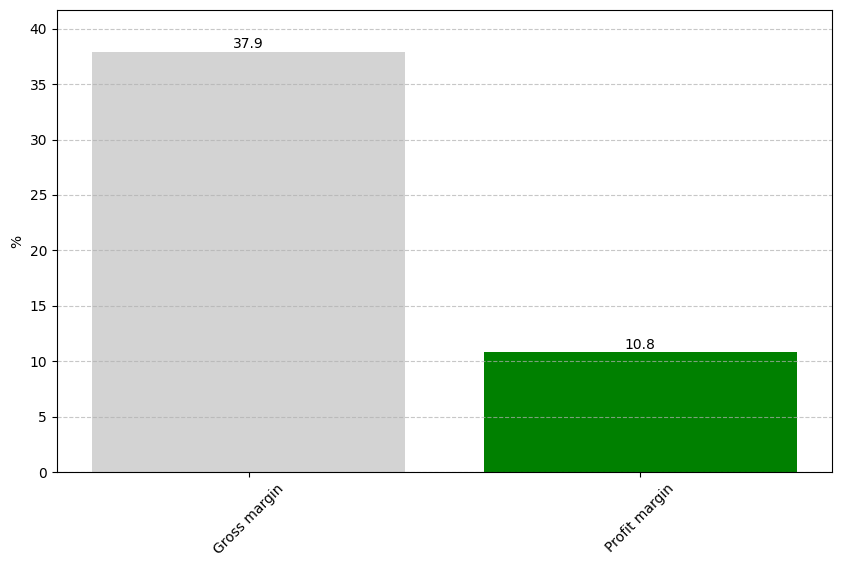

In [80]:
# Plotting margins
plt.figure(figsize=(10, 6))
percentages_colors_group3 = [get_color(value, thresholds) for value, thresholds 
                             in zip(percentage_values_group3, 
                                    percentage_thresholds_group3)]
bars = plt.bar(percentages_group3, percentage_values_group3, 
               color=percentages_colors_group3)
plt.ylabel('%')
plt.xticks(rotation=45)
plt.ylim(0, max(percentage_values_group3) * 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
annotate_bars(plt.gca(), percentage_values_group3)

fig = plt.gcf()
all_figures.append(fig)

plt.show()

Viimeiseksi tallennetaan projektin tulokset PDF muodossa koneelle.

In [81]:
# Saving all the plots to a file
t = info['symbol']

# Create a new figure to combine all the subplots
combined_fig = plt.figure(figsize=(8, 6 * len(all_figures)))

# Loop through all figures and add them to the combined figure
for i, fig in enumerate(all_figures):
    # Add a subplot to the combined figure
    sub = combined_fig.add_subplot(len(all_figures), 1, i + 1)
    # Add the individual figure to the subplot
    sub.imshow(fig.canvas.renderer.buffer_rgba())
    # Remove axes to prevent overlap
    sub.axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the combined figure
combined_fig.savefig(f'plots{t}.pdf', bbox_inches='tight')

# Close the combined figure to free up memory (optional)
plt.close(combined_fig)

print("PDF saved successfully!")

PDF saved successfully!


### Yhteenveto

Projektissa haetaan Yahoo Financesta alussa määritellyn yrityksen ilmaiseksi 
saatavilla oleva data. Tilinpäätöstietojen perusteella lasketaan yrityksen FCFE, 
FCFF ja vero-%. Tämän jälkeen alussa määriteltyjen tuottovaatimusten perusteella 
lasketaan yrityksen neljän vuoden keskimääräisen kassavirran perusteella 
nettonykyarvo ja osakkeen hinta nettonykyarvon perusteella. Osakkeen hintaa 
laskettaessa huomioidaan mahdollinen ero taloudellisten lukujen ja yrityksen 
kurssin valuutoissa hakemalla automaattisesti valuutanvaihtokurssi. Lopuksi 
haetaan ja visualisoidaan yrityksen kannattavuuden, maksukyvyn ja arvostuksen 
lukuja. Kaikki työssä tuotetut graafit tallennetaan pdf tiedostoon.

# Lähteet
CFA Institute. (2024). Free Cash Flow Valuation. CFA Program Level II | Equity 
Investments.